In [1]:
!pip install scikeras

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [5]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop,SGD
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
from google.colab import files
uploaded=files.upload()

Saving Alphabets_data.csv to Alphabets_data (2).csv


In [7]:
df=pd.read_csv('Alphabets_data.csv') # Reading the dataset

In [8]:
df.head() # Display the first few rows of the dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
df.tail() # Displays the last few rows of the dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [10]:
df.size # Displays the size of the dataset

340000

In [11]:
df.shape # Displays the shape of the dataset

(20000, 17)

In [12]:
df.info() # Displays the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [13]:
df.describe() # Returns statistical information

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [14]:
df.isnull().sum() # Missing values

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [15]:
df.shape[0]

20000

In [16]:
df.shape[1]

17

In [17]:
df['letter'].nunique()

26

In [18]:
df['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [19]:
num_cols=df.select_dtypes(include=['number']).columns # numerical columns

In [20]:
target=df['letter'] # Target variable
Features=df.drop('letter',axis=1) # Features variable

In [21]:
# Applying minmaxscaler
scaler=MinMaxScaler()

In [22]:
Features[num_cols]=scaler.fit_transform(Features[num_cols])

In [23]:
Features.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


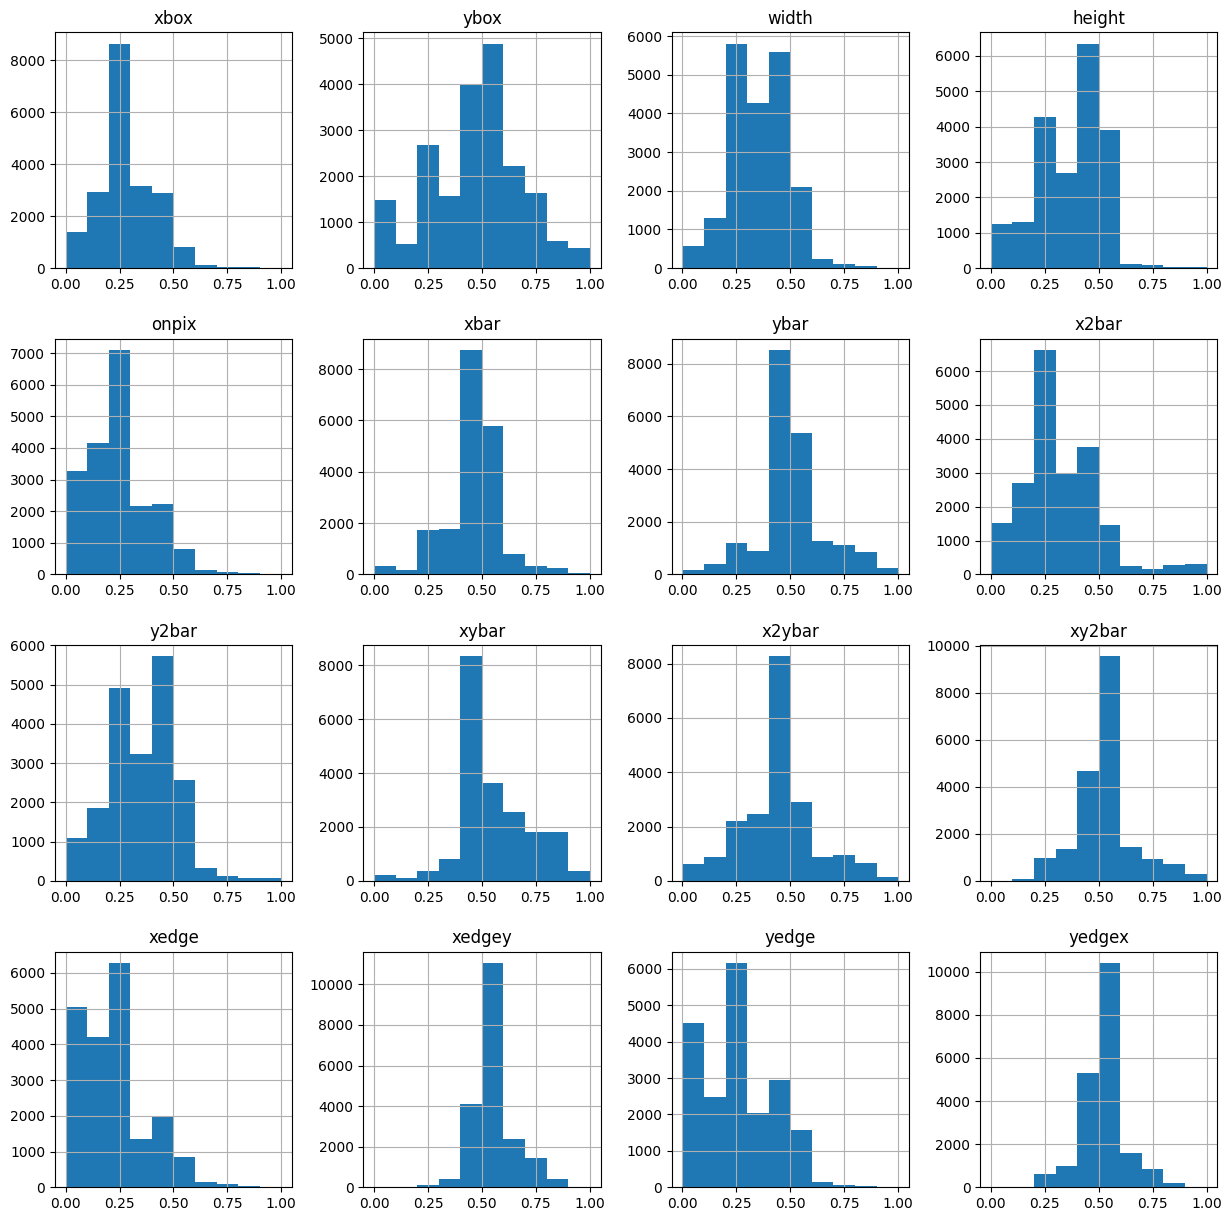

In [24]:
# Plots histogram
Features.hist(figsize=(15,15))
plt.show()

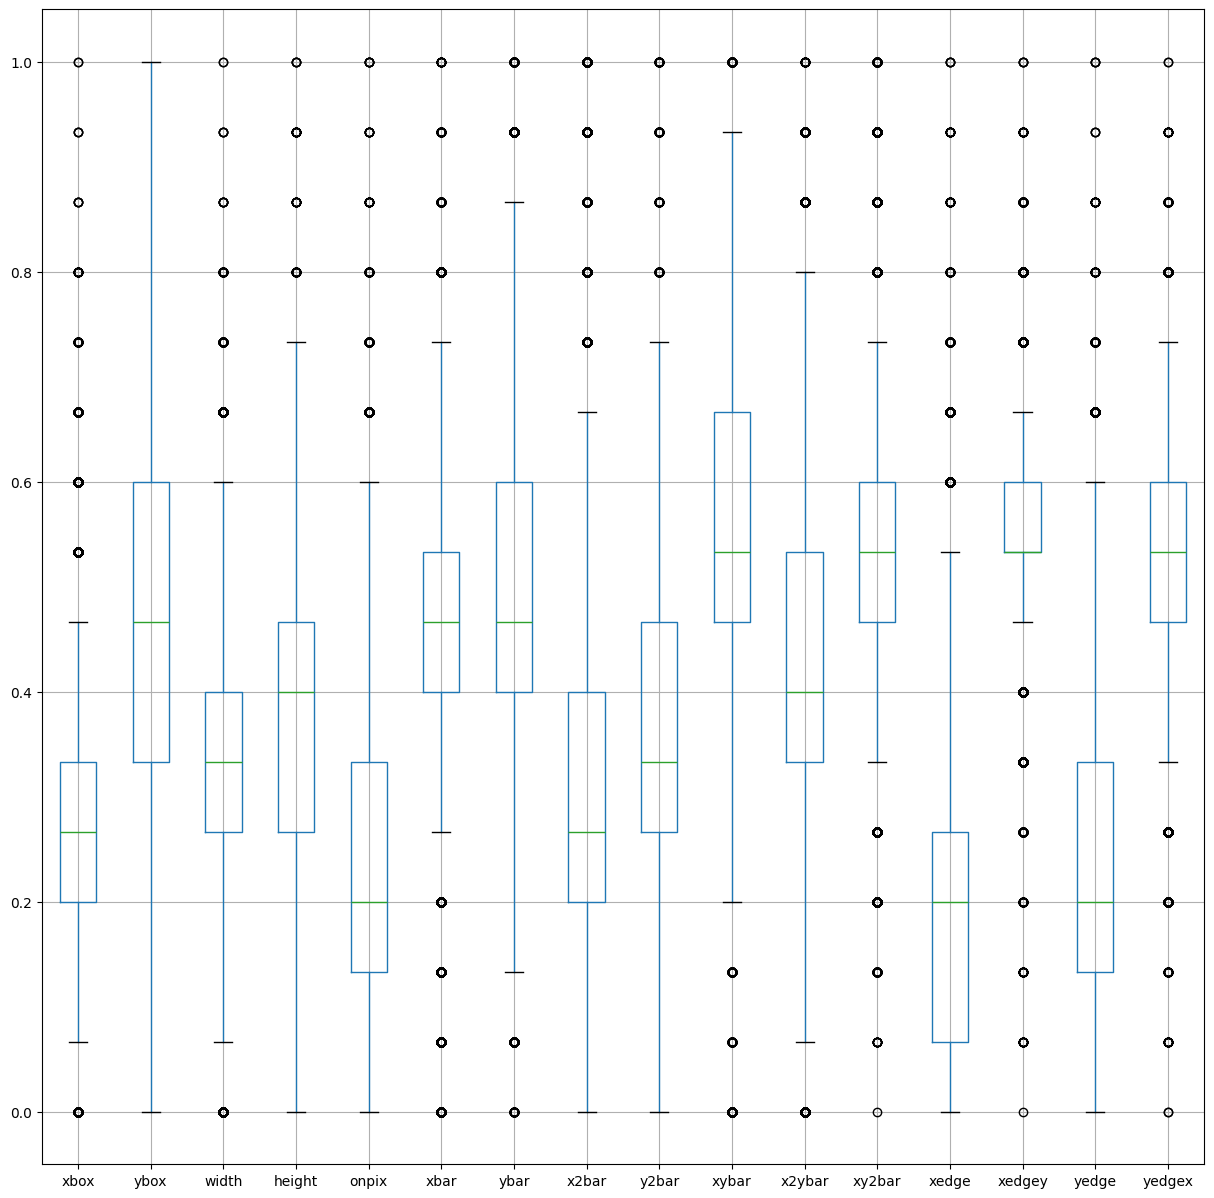

In [25]:
# Plots boxplot
Features.boxplot(figsize=(15,15))
plt.show()

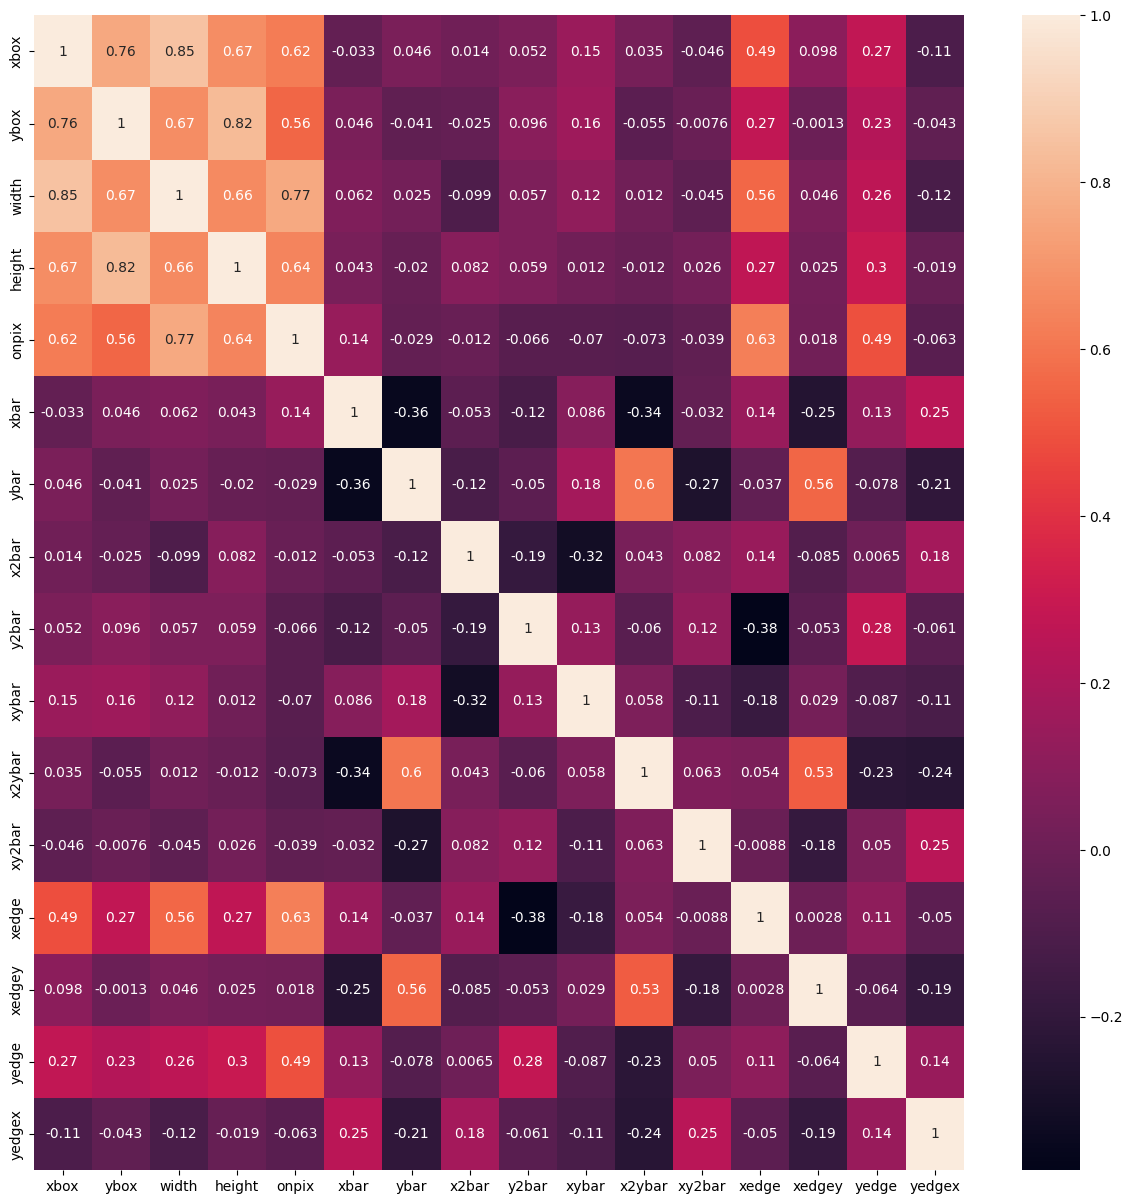

In [26]:
# Plots heatmap
plt.figure(figsize=(15,15))
sns.heatmap(Features.corr(),annot=True)
plt.show()

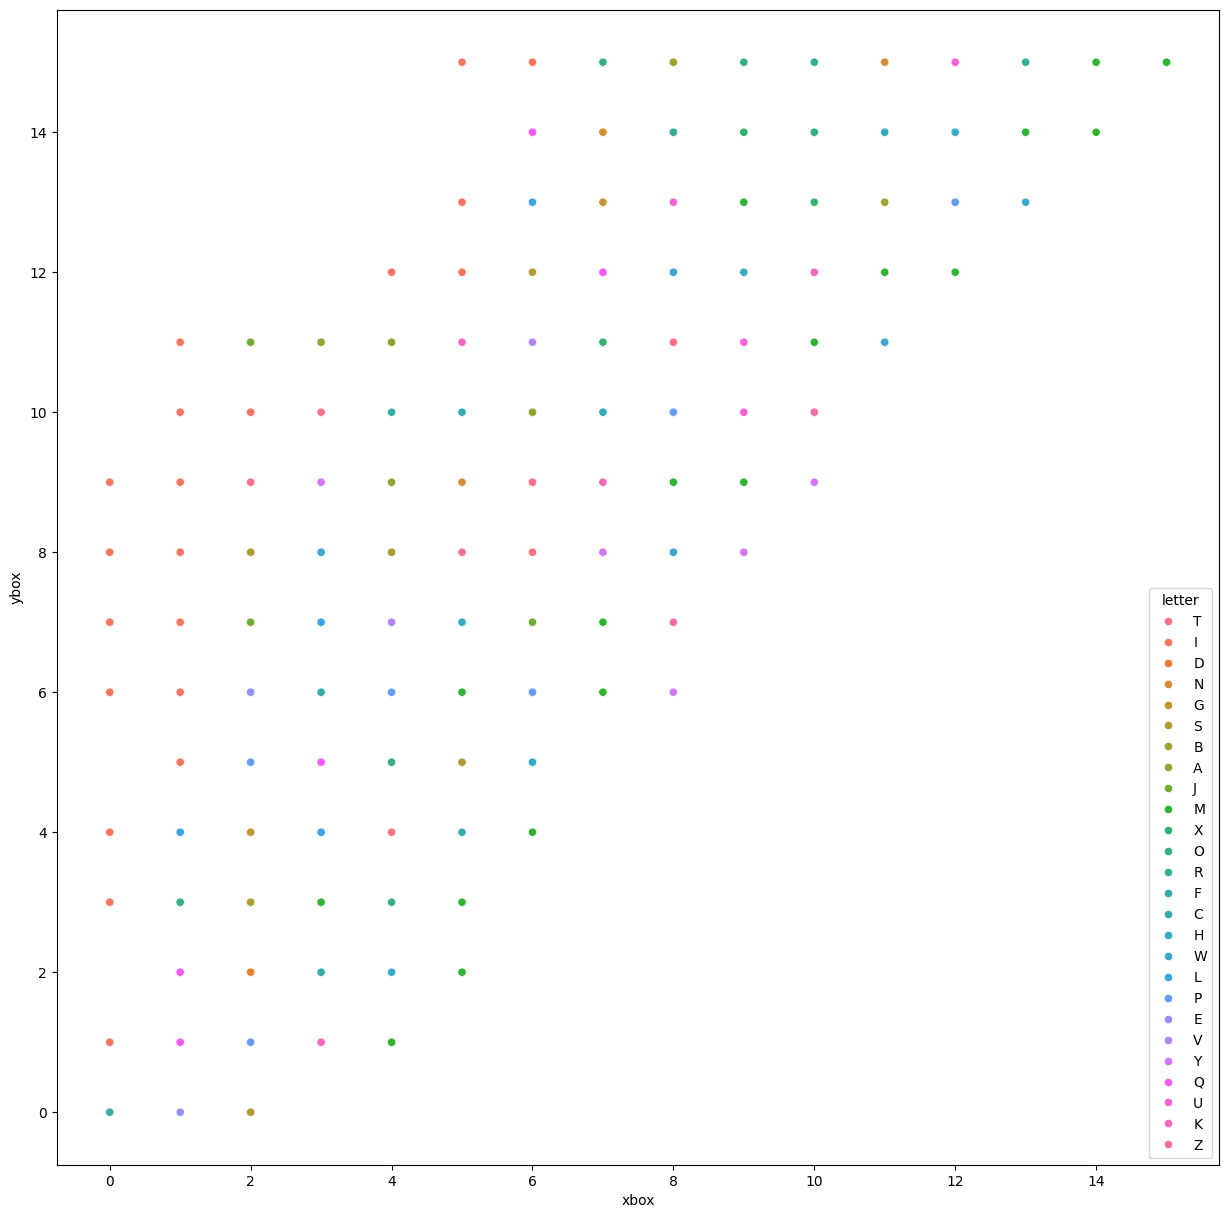

In [27]:
# Plots Scatterplot
plt.figure(figsize=(15,15))
sns.scatterplot(x='xbox',y='ybox',hue='letter',data=df)
plt.show()

In [28]:
# Splits training set and testig set
x_train,x_test,y_train,y_test=train_test_split(Features,target,test_size=0.2,random_state=42)

In [29]:
print(x_train.shape) # Prints x_train shape
print(x_test.shape) # Prints x_test shape
print(y_train.shape) # Prints y_train shape
print(y_test.shape) # Prints y_test shape

(16000, 16)
(4000, 16)
(16000,)
(4000,)


In [30]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder() # Applying labelencoder

In [32]:
le.fit(y_train)

LabelEncoder()

In [33]:
y_train_num=le.transform(y_train)
y_test_num=le.transform(y_test)

In [34]:
# Applying onehot
y_train_encoded=to_categorical(y_train_num)
y_test_encoded=to_categorical(y_test_num)

In [35]:
# Building Model
def create_model(hidden_layer_sizes=(64,), activation='relu', optimizer='adam', learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train.shape[1],)))  # Input layer

    # Add hidden layers based on hidden_layer_sizes
    for units in hidden_layer_sizes:
        model.add(keras.layers.Dense(units, activation=activation))

    model.add(keras.layers.Dense(len(np.unique(target)), activation='softmax'))  # Output layer

    # Compile the model with the specified optimizer and learning rate
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [36]:
model=create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,778 (10.85 KB)

 Trainable params: 2,778 (10.85 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history=model.fit(x_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2) # Traing the model using training data

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1393 - loss: 3.1605 - val_accuracy: 0.3703 - val_loss: 2.6259
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4305 - loss: 2.4266 - val_accuracy: 0.5356 - val_loss: 1.9948
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5560 - loss: 1.8750 - val_accuracy: 0.5781 - val_loss: 1.7014
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5985 - loss: 1.6271 - val_accuracy: 0.6134 - val_loss: 1.5330
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6270 - loss: 1.4679 - val_accuracy: 0.6416 - val_loss: 1.4296
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6405 - loss: 1.3630 - val_accuracy: 0.6478 - val_loss: 1.3409
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6624 - loss: 1.2924 - val_accuracy: 0.6697 - val_loss: 1.2860
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6744 - loss: 1.2293 - val_accuracy: 0.

In [39]:
# Make predictions on the test set
y_pred_probs=model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
# Get predicted labels (classes)
y_pred=np.argmax(y_pred_probs,axis=1)

In [41]:
# Convert numerical labels back to original letter labels if needed
y_pred_letters = le.inverse_transform(y_pred)

In [42]:
y_pred_letters

array(['E', 'X', 'A', ..., 'O', 'Y', 'Y'], dtype=object)

In [43]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test_num, y_pred)
precision=precision_score(y_test_num,y_pred,average='weighted')
recall=recall_score(y_test_num,y_pred,average='weighted')
f1=f1_score(y_test_num,y_pred,average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7045
Precision: 0.7054459095705311
Recall: 0.7045
F1 Score: 0.6988932341814147


HYPERPARAMETER TUNING

In [44]:
# Param grid
param_grid={
    'model__hidden_layer_sizes': [(64,), (128,), (64, 32)],  # Number of neurons in hidden layers
    'model__activation': ['relu', 'tanh'],  # Activation functions
    'optimizer': ['adam', 'rmsprop'],  # Optimizers
    'optimizer__learning_rate': [0.01, 0.001, 0.0001]  # Learning rates
    }

In [45]:
# Create Kerasclassifier
model = KerasClassifier(model=create_model, verbose=0)

In [46]:
# perform grid search
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=10,scoring='accuracy',error_score='raise')
grid_result=grid.fit(x_train,y_train_encoded)

In [47]:
# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_model = grid_result.best_estimator_.model_

Best: 0.523875 using {'model__activation': 'tanh', 'model__hidden_layer_sizes': (128,), 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.01}


In [48]:
# Predict on the test set using the best model
y_pred_probs = best_model.predict(x_test)
y_pred_best = np.argmax(y_pred_probs, axis=1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test_num, y_pred_best)
precision_best = precision_score(y_test_num, y_pred_best,average='weighted')
recall_best = recall_score(y_test_num, y_pred_best,average='weighted')
f1_best = f1_score(y_test_num, y_pred_best,average='weighted')
print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")

Tuned Model Performance:
Accuracy: 0.5495
Precision: 0.5568157691536433
Recall: 0.5495
F1 Score: 0.515492354949197


**Default Model:**

Accuracy: 0.7045 - This means the default model correctly predicted the letter for approximately 70.45% of the samples in the test set.

Precision: 0.7054 - Out of all the letters the model predicted to be a specific letter, approximately 70.54% were actually that letter.

Recall: 0.7045 - Out of all the actual instances of a specific letter in the test set, the model correctly identified approximately 70.45% of them.

F1 Score: 0.6989 - The F1 score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. An F1 score of 0.6989 indicates a reasonably good balance between precision and recall.


**Tuned Model:**

Accuracy: 0.54 - The tuned model only achieved an accuracy of about 55%, significantly lower than the default model.

Precision: 0.55 - The precision of the tuned model is also lower, indicating more false positives.

Recall: 0.54 - The recall is similar to the accuracy, reflecting a lower ability to find all instances of a specific letter.

F1 Score: 0.51 - The F1 score is considerably lower than the default model, suggesting a poor balance between precision and recall.

**Conclusion:**

Based on these results, the default model performs significantly better than the tuned model.

This is unexpected, as hyperparameter tuning is typically used to improve model performance.

Possible Reasons for Tuned Model's Poor Performance:

* Insufficient search space
* Overfittingdurning tuning
* Randomness